# Statistics 447b Project

In [1]:
library(tidyverse)
library(ggmap)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Google's Terms of Service: https://cloud.google.com/maps-platform/terms/.

Please cite ggmap if you use it! See citation("ggmap") for details.



In [267]:
citation("ggmap")


To cite ggmap in publications, please use:

  D. Kahle and H. Wickham. ggmap: Spatial Visualization with ggplot2.
  The R Journal, 5(1), 144-161. URL
  http://journal.r-project.org/archive/2013-1/kahle-wickham.pdf

A BibTeX entry for LaTeX users is

  @Article{,
    author = {David Kahle and Hadley Wickham},
    title = {ggmap: Spatial Visualization with ggplot2},
    journal = {The R Journal},
    year = {2013},
    volume = {5},
    number = {1},
    pages = {144--161},
    url = {https://journal.r-project.org/archive/2013-1/kahle-wickham.pdf},
  }


In [2]:
DatasetPath <- "./train.csv"

In [3]:
training <- read.csv(DatasetPath)

In [87]:
# remove near zero values for "TotalTimeStopped"
filter_training <- training %>% filter(TotalTimeStopped_p50 > 0)
filter_training$TotalTimeStopped_p50 <- log(filter_training$TotalTimeStopped_p50)
head(filter_training)

,RowId,IntersectionId,Latitude,Longitude,EntryStreetName,ExitStreetName,EntryHeading,ExitHeading,Hour,Weekend,⋯,TimeFromFirstStop_p40,TimeFromFirstStop_p50,TimeFromFirstStop_p60,TimeFromFirstStop_p80,DistanceToFirstStop_p20,DistanceToFirstStop_p40,DistanceToFirstStop_p50,DistanceToFirstStop_p60,DistanceToFirstStop_p80,City
,<int>,<int>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,1922012,1,33.75094,-84.39303,Mitchell Street Southwest,Peachtree Street Southwest,SE,NE,7,0,⋯,23,55,57,75,0.0,50.6,52.7,56.5,69.9,Atlanta
2,1922013,1,33.75094,-84.39303,Peachtree Street Southwest,Peachtree Street Southwest,NE,NE,7,0,⋯,26,29,31,37,0.0,57.3,70.6,78.6,99.8,Atlanta
3,1922014,1,33.75094,-84.39303,Peachtree Street Southwest,Mitchell Street Southwest,SW,SE,7,0,⋯,59,62,72,87,0.0,53.7,55.1,56.6,61.6,Atlanta
4,1922015,1,33.75094,-84.39303,Mitchell Street Southwest,Mitchell Street Southwest,SE,SE,8,0,⋯,0,34,60,110,0.0,0.0,63.0,88.0,206.9,Atlanta
5,1922016,1,33.75094,-84.39303,Mitchell Street Southwest,Peachtree Street Southwest,SE,NE,8,0,⋯,58,58,96,96,51.7,60.1,60.1,78.3,82.7,Atlanta
6,1922017,1,33.75094,-84.39303,Peachtree Street Southwest,Peachtree Street Southwest,NE,NE,8,0,⋯,0,26,34,43,0.0,0.0,60.0,73.7,95.5,Atlanta


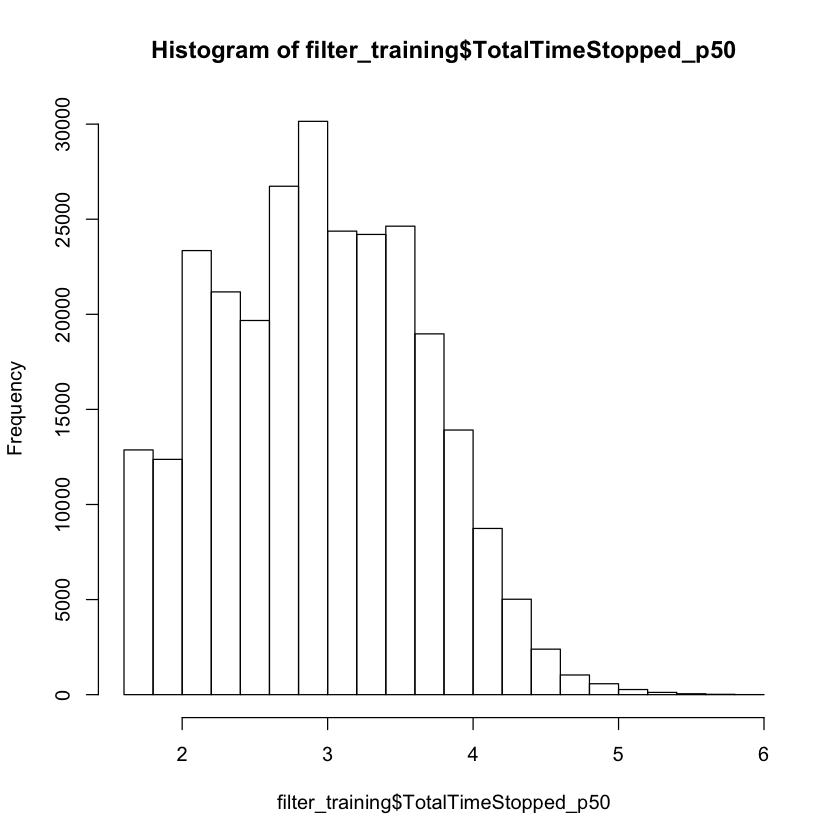

In [88]:
# create histogram of response variable
hist(filter_training$TotalTimeStopped_p50)

In [82]:
# feature engineering:
# transformation of EntryHeading and ExitHeading into a binary variable straightThrough

# reasoning: 
# a vehicle making a left or right turn must yeild to pedestrians and oncome traffic
# as well as, wait for the correct light. Therefore, one would expect a vehicle
# that doesn't go straight through take longer...

# Not all intersections are equal...
# Some intersections are 3 way fork intersections
augmented_training = filter_training %>% mutate(straightThrough = EntryHeading == ExitHeading)

In [265]:
training %>% 
    mutate(straightThrough = EntryHeading == ExitHeading) %>%
    group_by(straightThrough) %>%
    summarise(
        mean = mean(TotalTimeStopped_p50),
        median = median(TotalTimeStopped_p50)
             )

`summarise()` ungrouping output (override with `.groups` argument)



straightThrough,mean,median
<lgl>,<dbl>,<dbl>
FALSE,12.147925,0
TRUE,5.807178,0


In [266]:
isRightTurn <- function(entry, exit) {
    rightexit <- list(
        N = c("NW", "W", "SW"),
        NW = c("W", "SW", "S"),
        W = c("SW", "S", "SE"),
        SW = c("S", "SE", "E"),
        S = c("SE", "E", "NE"),
        SE = c("E", "NE", "N"),
        E = c("NE", "N", "NW"),
        NE = c("N", "NW", "W")
    )
    exit %in% rightexit[[entry]]
}

In [251]:
isRightTurn("S", "E")

[1] TRUE

In [252]:
rightTurnsAllowed <- function(dataset) {
    dataset["rightTurn"] <- isRightTurn()
}

In [253]:
rightTurnsAllowed(augmented_training)

ERROR: Error: Problem with `mutate()` input `rightTurn`.
[31m✖[39m recursive indexing failed at level 2

[34mℹ[39m Input `rightTurn` is `isRightTurn(as.character(EntryHeading), as.character(EntryHeading))`.


In [236]:
list(SE=1234)[as.character(augmented_training[1,]["EntryHeading"])]
as.character(augmented_training[1,][["EntryHeading"]])

$<NA>
NULL


[1] "SE"

In [183]:
    rightexit <- list(
        N = c("NW", "W", "SW"),
        NW = c("W", "SW", "S"),
        W = c("SW", "S", "SE"),
        SW = c("S", "SE", "E"),
        S = c("SE", "E", "NE"),
        SE = c("E", "NE", "N"),
        E = c("NE", "N", "NW"),
        NE = c("N", "NW", "W")
    )

In [169]:
c(rightexit[["N"]])

[1] "NW" "W"  "SW"

In [170]:
rightTurnsAllowed <- function(dataset) {
    leftexit <- list(
        N = c("NW", "W", "SW"),
        NW = c("W", "SW", "S"),
        W = c("SW", "S", "SE"),
        SW = c("S", "SE", "E"),
        S = c("SE", "E", "NE"),
        SE = c("E", "NE", "N"),
        E = c("NE", "N", "NW"),
        NE = c("N", "NW", "W"),
    )
    dataset %>% mutate()
}

In [89]:
unique(augmented_training$EntryHeading)

[1] SE NE SW W  N  S  E  NW
Levels: E N NE NW S SE SW W

In [84]:
# there are many interaction between the variables

In [6]:
# log transformation
# why do we need to transorm the data?

In [7]:
# check for na values
cbind(
   lapply(
     lapply(filter_training, is.na)
     , sum)
   )

RowId,0
IntersectionId,0
Latitude,0
Longitude,0
EntryStreetName,0
ExitStreetName,0
EntryHeading,0
ExitHeading,0
Hour,0
Weekend,0
Month,0


In [38]:
boundingBox <- function (dataset) {
    c(
        left = min(dataset$Longitude), 
        bottom = min(dataset$Latitude), 
        right = max(dataset$Longitude), 
        top = max(dataset$Latitude)
    )
}

In [256]:
generate_map <- function (dataset) {
    u <- unique(dataset$City)
    for (city in u) {
        ccity_dataset <- dataset %>% filter(City == city)
        cbox <- boundingBox(ccity_dataset)
        print(city)
        print(
            get_stamenmap(cbox, zoom = 13, maptype = "toner-lite") %>% ggmap() +
            geom_point(data = ccity_dataset, mapping = aes(
                x = Longitude, 
                y = Latitude,
                col = TimeFromFirstStop_p50
            )) + 
            scale_color_distiller(palette = "YlOrRd", direction = 1)
        )
    }
}

[1] "Atlanta"


42 tiles needed, this may take a while (try a smaller zoom).



[1] "Boston"
[1] "Chicago"


99 tiles needed, this may take a while (try a smaller zoom).



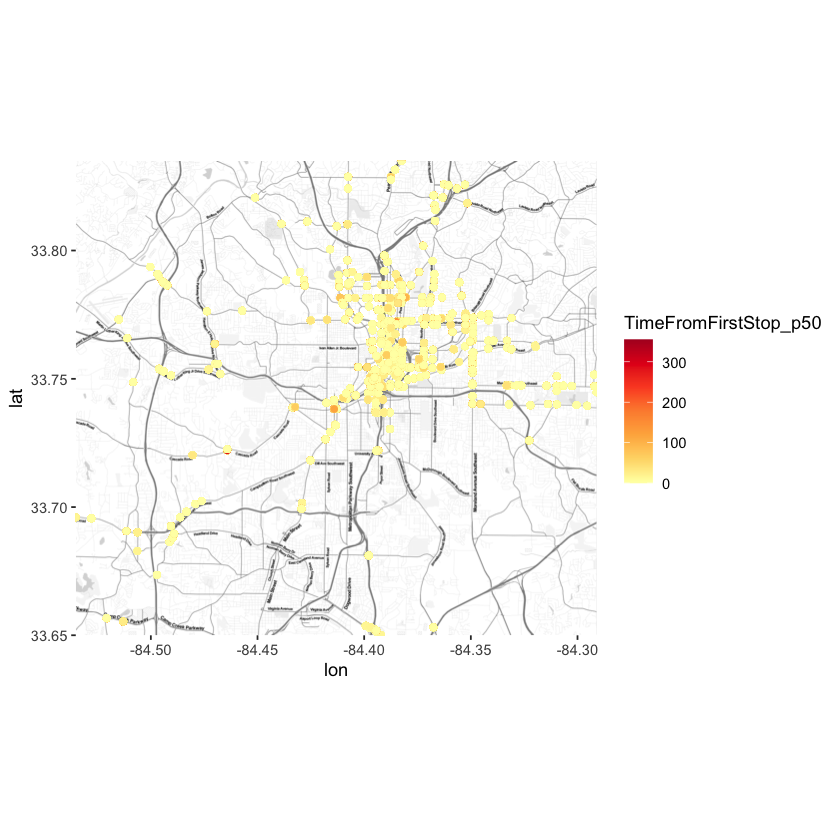

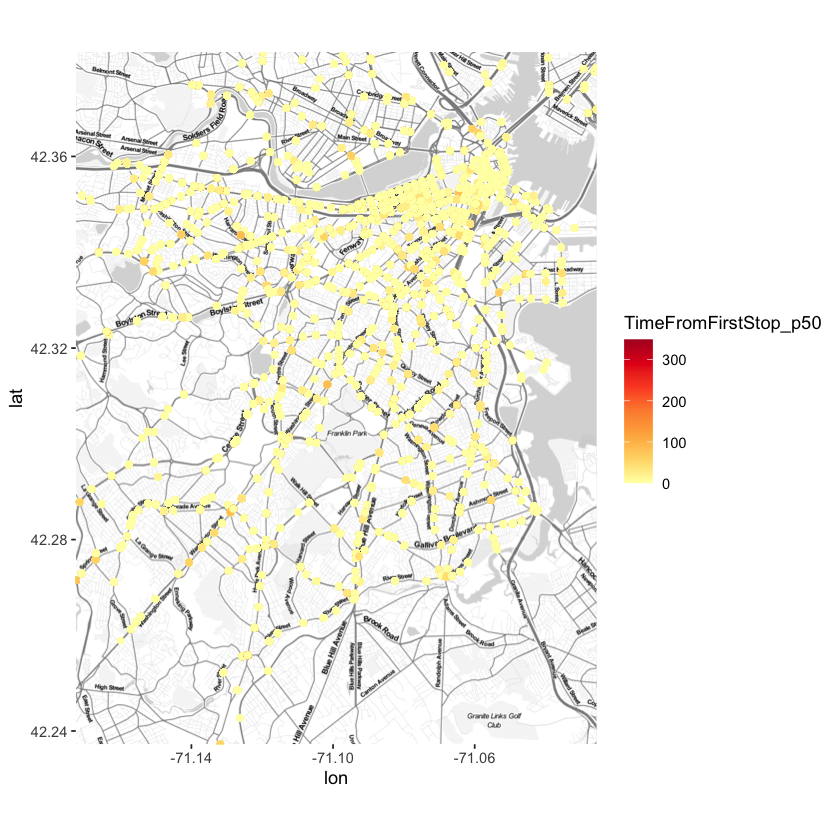

[1] "Philadelphia"


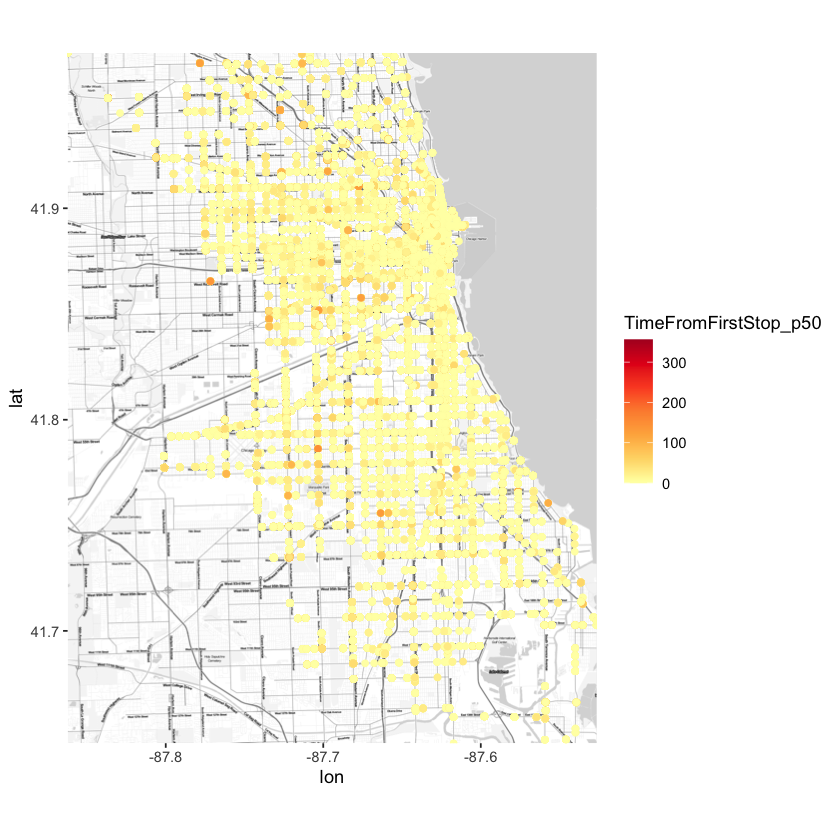

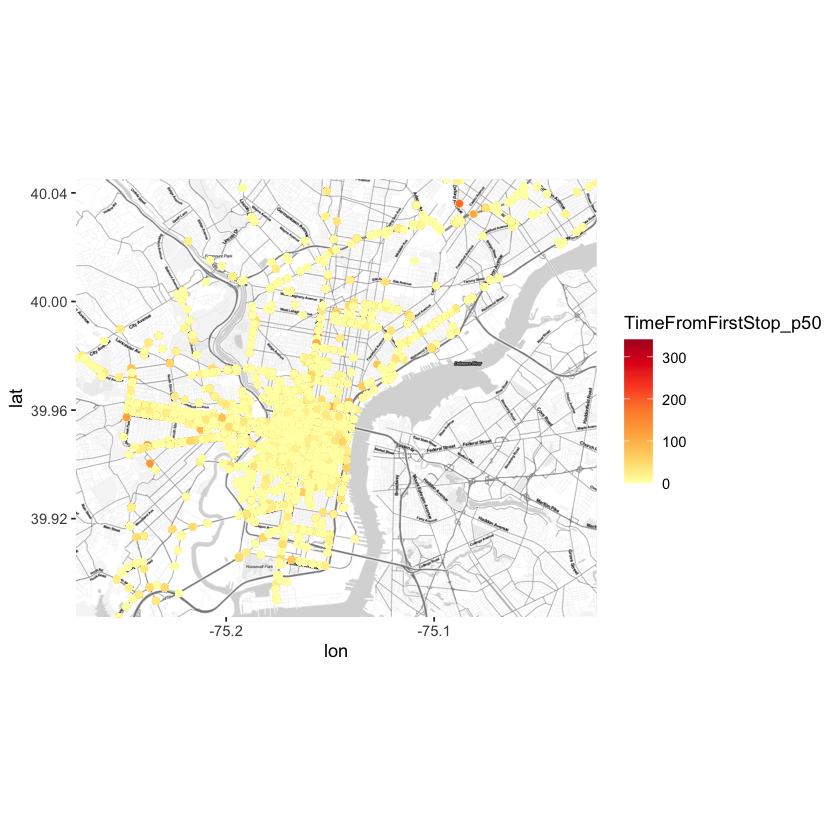

In [258]:
generate_map(training)

In [51]:
a <- colnames(filter_training)
for (icname in a) {
    print(icname)
    print(hist(filter_training %>% select(icname)))
}

[1] "RowId"


ERROR: Error in hist.default(filter_training %>% select(icname)): 'x' must be numeric


In [47]:
colnames(filter_training)

[1] "RowId"                   "IntersectionId"         
 [3] "Latitude"                "Longitude"              
 [5] "EntryStreetName"         "ExitStreetName"         
 [7] "EntryHeading"            "ExitHeading"            
 [9] "Hour"                    "Weekend"                
[11] "Month"                   "Path"                   
[13] "TotalTimeStopped_p20"    "TotalTimeStopped_p40"   
[15] "TotalTimeStopped_p50"    "TotalTimeStopped_p60"   
[17] "TotalTimeStopped_p80"    "TimeFromFirstStop_p20"  
[19] "TimeFromFirstStop_p40"   "TimeFromFirstStop_p50"  
[21] "TimeFromFirstStop_p60"   "TimeFromFirstStop_p80"  
[23] "DistanceToFirstStop_p20" "DistanceToFirstStop_p40"
[25] "DistanceToFirstStop_p50" "DistanceToFirstStop_p60"
[27] "DistanceToFirstStop_p80" "City"

In [48]:
hist(filter_training["RowId"])

ERROR: Error in hist.default(filter_training["RowId"]): 'x' must be numeric


In [ ]:
# remove missing values

In [ ]:
# transform variables

In [3]:
# pairwise scatter plots

In [4]:
# boxplots

In [6]:
# correlation table

# co - lineararity

In [ ]:
# Left turn, right turn, straight through, feature engineering column...